In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import numpy as np
print(tf. __version__)

2.8.0


In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "C:\\Users\\lenovo\\Documents\\work\\Skin Disease Classification\\MD_disease_Classification\\3diseaseandothers",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 798 files belonging to 4 classes.


In [4]:
class_names = dataset.class_names
class_names

['Acne', 'Psoriasis', 'Vitiligo', 'others']

In [5]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[1 0 3 1 1 3 3 3 3 2 2 0 2 0 0 1 1 0 2 0 0 1 1 2 1 3 1 0 1 1 2 0]


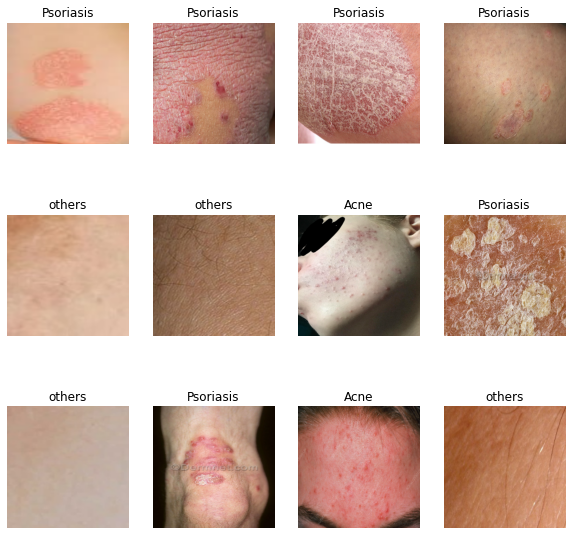

In [6]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [13]:
len(dataset)


25

In [14]:
train_size = 0.8
len(dataset)*train_size

20.0

In [15]:
train_ds = dataset.take(20)
len(train_ds)

20

In [16]:
test_ds = dataset.skip(20)
len(test_ds)

5

In [17]:
val_size=0.1
len(dataset)*val_size

2.5

In [18]:
val_ds = test_ds.take(2)
len(val_ds)

2

In [19]:
test_ds = test_ds.skip(2)
len(test_ds)

3

In [14]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [15]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)


In [16]:
len(train_ds)


20

In [17]:
len(val_ds)


2

In [18]:
len(test_ds)


3

In [19]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [20]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [21]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [22]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [23]:
model.compile(
    optimizer='adam',
#     loss='categorical_crossentropy',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
#     loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
#     loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#     loss=tf.keras.losses.BinaryCrossentropy,
    metrics=['accuracy']
)

In [24]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
20/20 [==============================] - 69s 3s/step - loss: 1.3849 - accuracy: 0.2649 - val_loss: 1.3690 - val_accuracy: 0.2656
Epoch 2/50
20/20 [==============================] - 65s 3s/step - loss: 1.3469 - accuracy: 0.2821 - val_loss: 1.2091 - val_accuracy: 0.4688
Epoch 3/50
20/20 [==============================] - 65s 3s/step - loss: 1.1957 - accuracy: 0.4248 - val_loss: 1.0857 - val_accuracy: 0.4688
Epoch 4/50
20/20 [==============================] - 66s 3s/step - loss: 1.1073 - accuracy: 0.5266 - val_loss: 1.2810 - val_accuracy: 0.3438
Epoch 5/50
20/20 [==============================] - 64s 3s/step - loss: 1.2330 - accuracy: 0.4216 - val_loss: 1.2016 - val_accuracy: 0.6094
Epoch 6/50
20/20 [==============================] - 65s 3s/step - loss: 1.1504 - accuracy: 0.4828 - val_loss: 1.1309 - val_accuracy: 0.3906
Epoch 7/50
20/20 [==============================] - 64s 3s/step - loss: 1.0446 - accuracy: 0.5828 - val_loss: 0.8611 - val_accuracy: 0.6250
Epoch 8/50
20/20 [==

In [25]:
scores = model.evaluate(test_ds)


3/3 [==============================] - 5s 551ms/step - loss: 0.2472 - accuracy: 0.9255


In [26]:
scores


[0.2471722513437271, 0.9255319237709045]

In [27]:
history

In [28]:
history.params


{'verbose': 1, 'epochs': 50, 'steps': 20}

In [29]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [30]:
type(history.history['loss'])


list

In [31]:
len(history.history['loss'])


50

In [32]:
history.history['loss'][:5] # show loss for first 5 epochs


[1.3848676681518555,
 1.3468881845474243,
 1.1957288980484009,
 1.1072874069213867,
 1.2329610586166382]

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

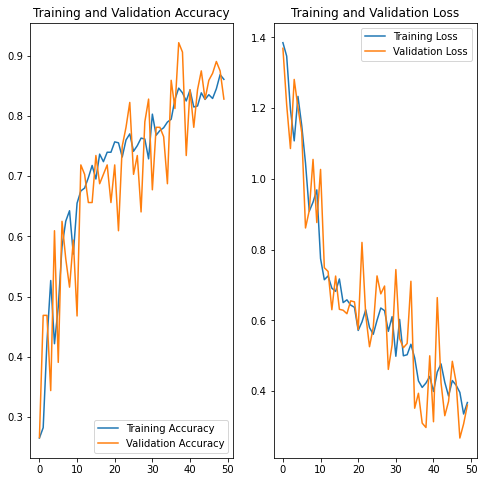

In [34]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Psoriasis
predicted label: Psoriasis


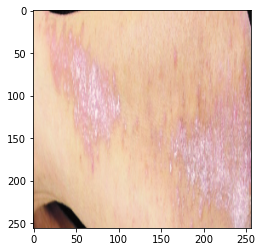

In [35]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

### Prediction

In [9]:
from tensorflow import keras
# model.save('Psoriasis_Vitiligo_Acne_and_others_disease_classification.h5')
model = keras.models.load_model('Psoriasis_Vitiligo_Acne_and_others_disease_classification.h5')

In [22]:
def predict(model, img):
#     img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
#     print(predictions)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 *(np.max(predictions[0])), 2)
    return predicted_class, confidence

In [11]:
import glob,random
import time
image = keras.preprocessing.image
import numpy as np


# TestImage= glob.glob("C:\\Users\\lenovo\\Documents\\work\\Skin Disease Classification\\MD_disease_Classification\\Vitiligo_test_dataset\\*")
# # plt.imshow(img.numpy.().astype("uint8"))
# # img = image.load_img(test, target_size=(256, 256))
# # plt.imshow(img.numpy.().astype("uint8"))
# images = glob.glob(random.choice(TestImage))
# random_image = random.choice(images)

# img = image.load_img(random_image, target_size=(256, 256))
# # x = image.img_to_array(img)
# # x = np.expand_dims(x, axis=0)
# # images1 = np.vstack([x])
# # plt.imshow(img.astype("uint8"))
# plt.imshow(img)
# start=time.localtime()
# print(start)
# predicted_class, confidence = predict(model, img)
# end = time.localtime()
# print(end)
# plt.title(f" Predicted: {predicted_class}.\n Confidence: {confidence}%")
# plt.axis("off")

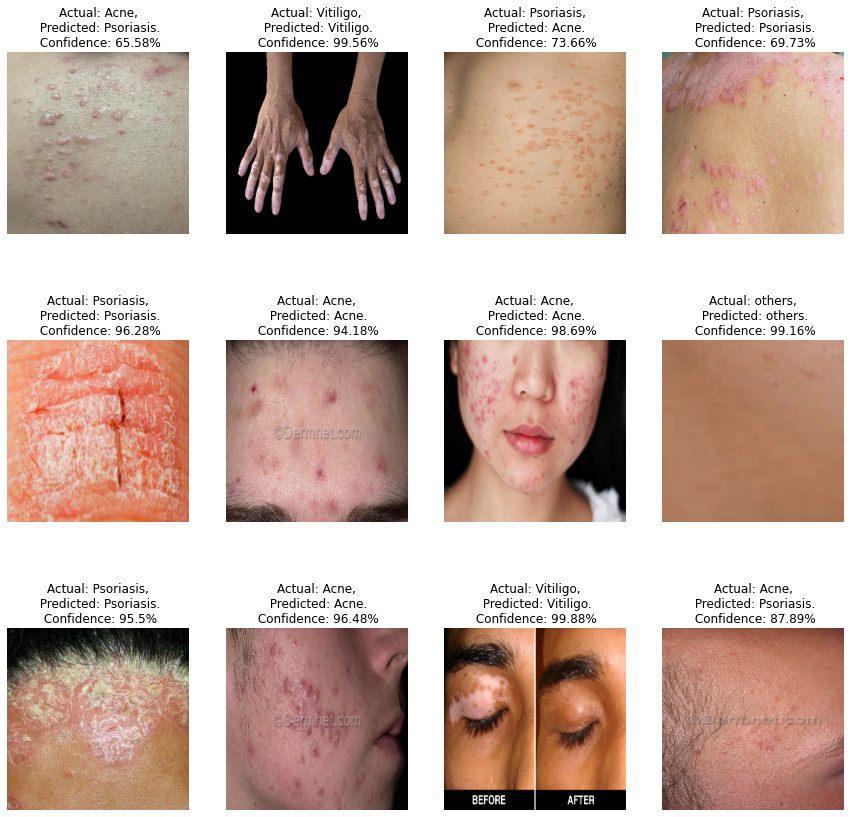

In [21]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(12):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
# model.save("Skin_Disease_Classification_including_others(small_dataset).h5")

In [ ]:
# import os
# model_version=max([int(i) for i in os.listdir("skin_disease_models") + [0]])+1
# model.save(f"skin_disease_models/{model_version}")

In [37]:
from tensorflow import keras
import glob
import numpy as np
import cv2
image= keras.preprocessing.image
import os
dim=(256,256)
# model = keras.models.load_model("C:\\Users\\lenovo\\Documents\\work\\Skin Disease Classification\\datasets\\skin disease classification\\Skin_Disease_Classification(small_dataset).h5")
test_img=glob.glob("C:\\Users\\lenovo\\Documents\\work\\Skin Disease Classification\\MD_disease_Classification\\Testimg\\*")
img = image.load_img(test_img, target_size=(256,256))
# img=cv2.resize(test_img,dim)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
# images = np.vstack([x])
predicted_class, confidence = predict(model, images)

# img = image.load_img(test_image, target_size=(256,256))
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)
# images = np.vstack([x])
classes = model.predict(images, batch_size=1)
print(classes)
y_classes = classes.argmax(axis=-1)
print(y_classes)

TypeError: expected str, bytes or os.PathLike object, not list

In [47]:
import json
with open("psoriasis_vitiligo_acne_others_dictionary.json","w") as f:
    f.write(json.dumps(class_names))

In [48]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets
